In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import tqdm

In [2]:
folder = '/media/ssd_reza/sajjad/segment/nus_centerpoint_early_activations'
files = os.listdir(folder)
# load random image
labels = np.zeros((len(files), 500,500,2), dtype=bool)

progress = tqdm.tqdm(total=len(files))
for itr, file in enumerate(files):
    img = cv2.imread(os.path.join(folder, file), cv2.IMREAD_GRAYSCALE)
    labels[itr,:,:,0] = (img ==255)
    labels[itr,:,:,1] = (img == 128) 
    progress.update(1)
progress.close()

100%|██████████| 23895/23895 [13:45<00:00, 28.95it/s]


True

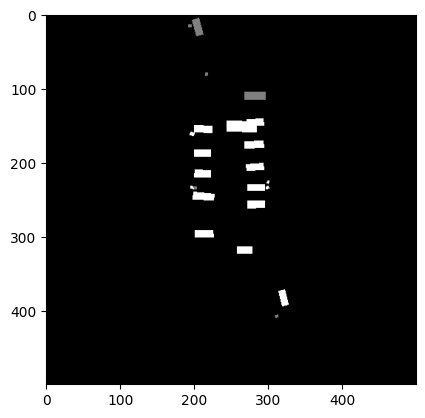

In [3]:
plt.imshow(img, cmap='gray')
np.any(img==255)

In [4]:

trust_labels = np.sum(labels[:,:,:,0], axis=0)
notrust_labels = np.sum(labels[:,:,:,1], axis=0)


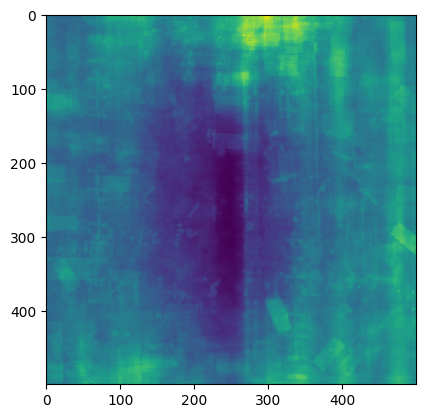

In [28]:
plt.imshow(notrust_labels)
plt.show()

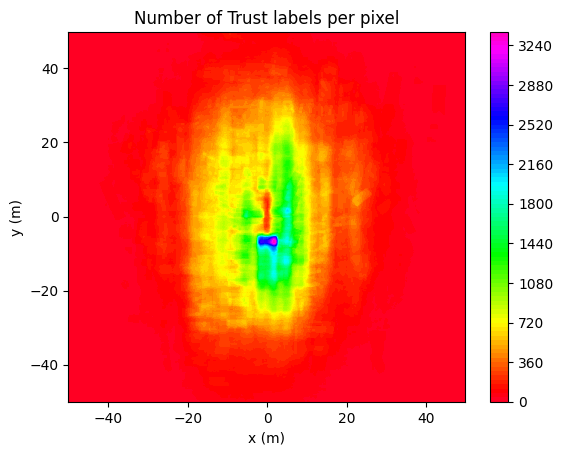

In [10]:
x = np.arange(-50,50, 0.2)
y = np.arange(-50,50, 0.2)
xx, yy = np.meshgrid(x, y)
plt.contourf(xx, yy, trust_labels, cmap='gist_rainbow', levels=100)
# x and y labels
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Number of Trust labels per pixel')
plt.colorbar()
plt.show()

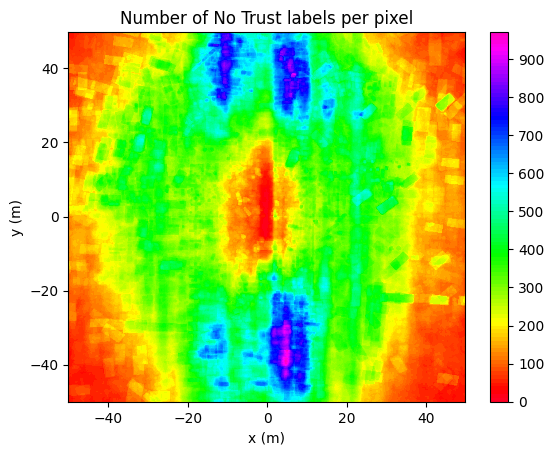

In [11]:
x = np.arange(-50,50, 0.2)
y = np.arange(-50,50, 0.2)
xx, yy = np.meshgrid(x, y)
plt.contourf(xx, yy, notrust_labels, cmap='gist_rainbow', levels=100)
# x and y labels
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Number of No Trust labels per pixel')
plt.colorbar()
plt.show()